In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# from google.colab import drive 
# drive.mount('/content/drive')


In [5]:
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

drive_project_folder_path='/content/drive/MyDrive/ML-AI_capstone_project'

In [6]:
# ! kaggle datasets download shyambhu/hands-and-palm-images-dataset
! cp "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/hands-and-palm-images-dataset.zip" "/content/hands-and-palm-images-dataset.zip"

In [7]:
!unzip hands-and-palm-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Hands/Hands/Hand_0006508.jpg  
  inflating: Hands/Hands/Hand_0006509.jpg  
  inflating: Hands/Hands/Hand_0006510.jpg  
  inflating: Hands/Hands/Hand_0006511.jpg  
  inflating: Hands/Hands/Hand_0006512.jpg  
  inflating: Hands/Hands/Hand_0006513.jpg  
  inflating: Hands/Hands/Hand_0006514.jpg  
  inflating: Hands/Hands/Hand_0006515.jpg  
  inflating: Hands/Hands/Hand_0006516.jpg  
  inflating: Hands/Hands/Hand_0006517.jpg  
  inflating: Hands/Hands/Hand_0006518.jpg  
  inflating: Hands/Hands/Hand_0006519.jpg  
  inflating: Hands/Hands/Hand_0006520.jpg  
  inflating: Hands/Hands/Hand_0006521.jpg  
  inflating: Hands/Hands/Hand_0006522.jpg  
  inflating: Hands/Hands/Hand_0006523.jpg  
  inflating: Hands/Hands/Hand_0006524.jpg  
  inflating: Hands/Hands/Hand_0006525.jpg  
  inflating: Hands/Hands/Hand_0006526.jpg  
  inflating: Hands/Hands/Hand_0006527.jpg  
  inflating: Hands/Hands/Hand_0006528.jpg  
  inflating: Hands/Hands/

In [8]:
# ! cp "/content/hands-and-palm-images-dataset.zip" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/"

In [9]:
### make a list of 
from tensorflow.keras.utils import image_dataset_from_directory


In [10]:
import pandas as pd
dataset_dir_path='/content/Hands/Hands'
df=pd.read_csv('HandInfo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11076 non-null  int64 
 1   age             11076 non-null  int64 
 2   gender          11076 non-null  object
 3   skinColor       11076 non-null  object
 4   accessories     11076 non-null  int64 
 5   nailPolish      11076 non-null  int64 
 6   aspectOfHand    11076 non-null  object
 7   imageName       11076 non-null  object
 8   irregularities  11076 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 778.9+ KB


In [11]:
### check the resolution and num of color channels in the images
def find_num_channels_in_imgs(dataset_dir_path):
    from os import walk ## see https://hyp.is/DAhG1PfzEe2Qw3vXNIwQ3Q/www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

    import cv2
    first_img_np=cv2.imread(f'{dataset_dir_path}/{list(walk(dataset_dir_path))[0][2][0]}')
    return first_img_np.shape[-1]
num_channels=find_num_channels_in_imgs(dataset_dir_path)

In [12]:



def get_col_val_list_in_alphabetical_order_file_names_dict(dataset_dir_path,csv_df):
    df=csv_df.set_index('imageName')

    from os import walk ## see https://hyp.is/DAhG1PfzEe2Qw3vXNIwQ3Q/www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
    # print(list(walk(dataset_dir_path))[0][2][0])
    img_filenames_list=list(walk(dataset_dir_path))[0][2]
    col_val_list_in_order_file_names_dict={}


    for col in df.columns.to_list():
        col_val_list_in_order_file_names_dict[col]=[]

        for filename in img_filenames_list:
            
            col_val_list_in_order_file_names_dict[col].append(df[col][filename])
        # col_val_list_in_order_file_names_dict['gender']=df['gender'][df['imageName'][df['imageName']== filename ].index[0]]
    return col_val_list_in_order_file_names_dict

col_val_list_in_order_file_names_dict=get_col_val_list_in_alphabetical_order_file_names_dict(dataset_dir_path,csv_df=df)
# def make_arr_of_images_and_labels():
#     pass

In [13]:
y_gen_nonenc=col_val_list_in_order_file_names_dict['gender']
 ## so that we know which is 0 and 1; male will be encoded as 0 and female 1

def encode_labels(y_nonenc,categories_list):
    from sklearn.preprocessing import OrdinalEncoder
    y_nonenc=np.array(y_nonenc).reshape(-1,1)
    oe=OrdinalEncoder(categories=[categories_list])
    y_enc_np=oe.fit_transform(y_nonenc)
    return y_enc_np

y_gen_enc_np=encode_labels(y_gen_nonenc,['male','female'])


In [14]:
df

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0
...,...,...,...,...,...,...,...,...,...
11071,1589,22,female,fair,0,0,palmar left,Hand_0011740.jpg,0
11072,1589,22,female,fair,0,0,palmar left,Hand_0011741.jpg,0
11073,1589,22,female,fair,0,0,palmar left,Hand_0011742.jpg,0
11074,1589,22,female,fair,0,0,palmar left,Hand_0011743.jpg,0


In [16]:

## waste
# def get_raw_image(dataset_dir_path):
#     full_img_np =cv2.imread(f'{dataset_dir_path}/Hand_0000002.jpg')
#     return full_img_np.shape

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11076 non-null  int64 
 1   age             11076 non-null  int64 
 2   gender          11076 non-null  object
 3   skinColor       11076 non-null  object
 4   accessories     11076 non-null  int64 
 5   nailPolish      11076 non-null  int64 
 6   aspectOfHand    11076 non-null  object
 7   imageName       11076 non-null  object
 8   irregularities  11076 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 778.9+ KB


In [18]:
df.duplicated().sum() ## get number of duplicate rows

0

In [19]:
df.drop(['imageName','id'],axis=1).mode() ### most common categories

,age,gender,skinColor,accessories,nailPolish,aspectOfHand,irregularities
0,21,female,medium,0,0,dorsal right,0


In [20]:
from IPython.display import display, HTML


In [21]:
def display_histograms(df):
    value_counts_dict={}
    cols_to_exclude=['imageName','id']
    for col_name in df.columns.to_list():
        if col_name not in cols_to_exclude:
            value_counts_dict[col_name]=df[col_name].value_counts()
            plt.figure()
            plt.title(col_name)
            df[col_name].hist()
            if col_name in ['age']:
                plt.figure()
                plt.title(col_name)
                plt.boxplot(df[col_name].to_list())
        # display(value_counts_dict[col_name])
        # display(HTML(value_counts_dict[col_name].to_html()))



IRREGULARITIES
0    10912
1      164
Name: irregularities, dtype: int64
number of images with irregularities 164


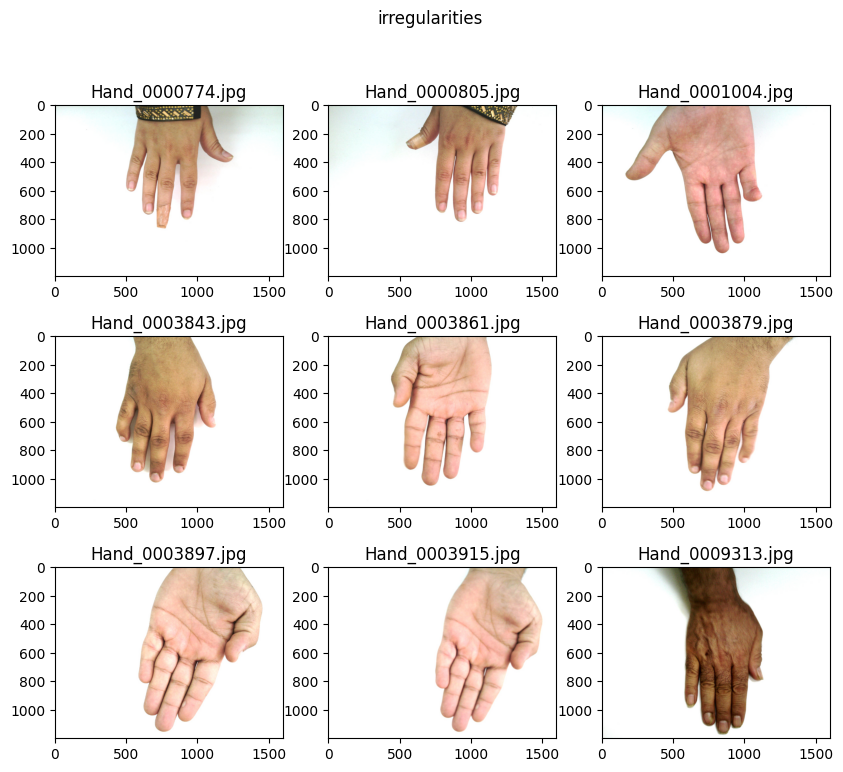


ACCESSORIES
0    7865
1    3211
Name: accessories, dtype: int64
number of images with accessories 3211


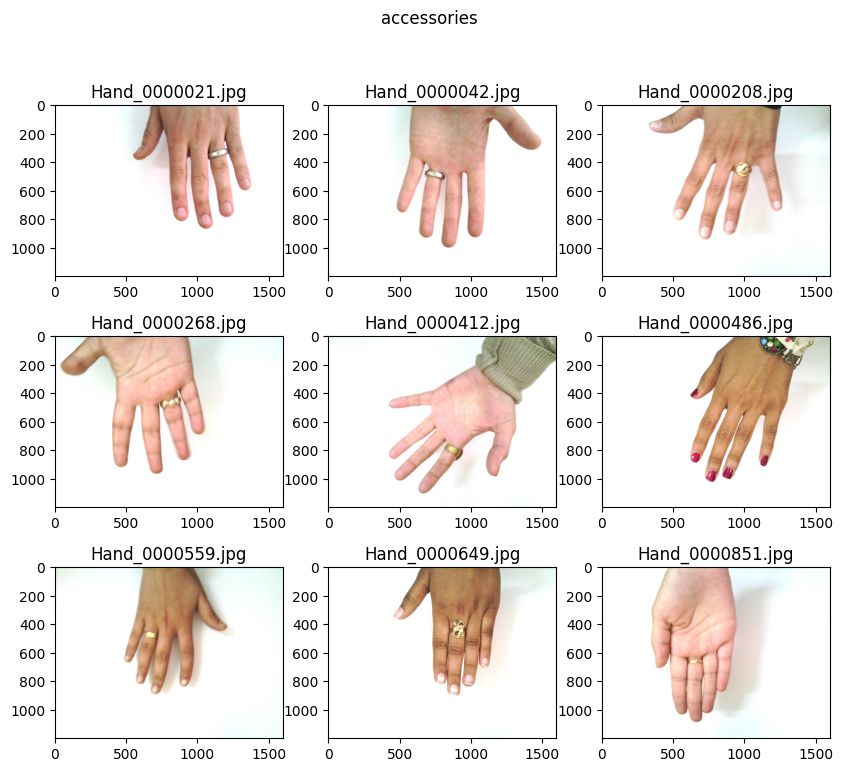


NAILPOLISH
0    10009
1     1067
Name: nailPolish, dtype: int64
number of images with nailPolish 1067


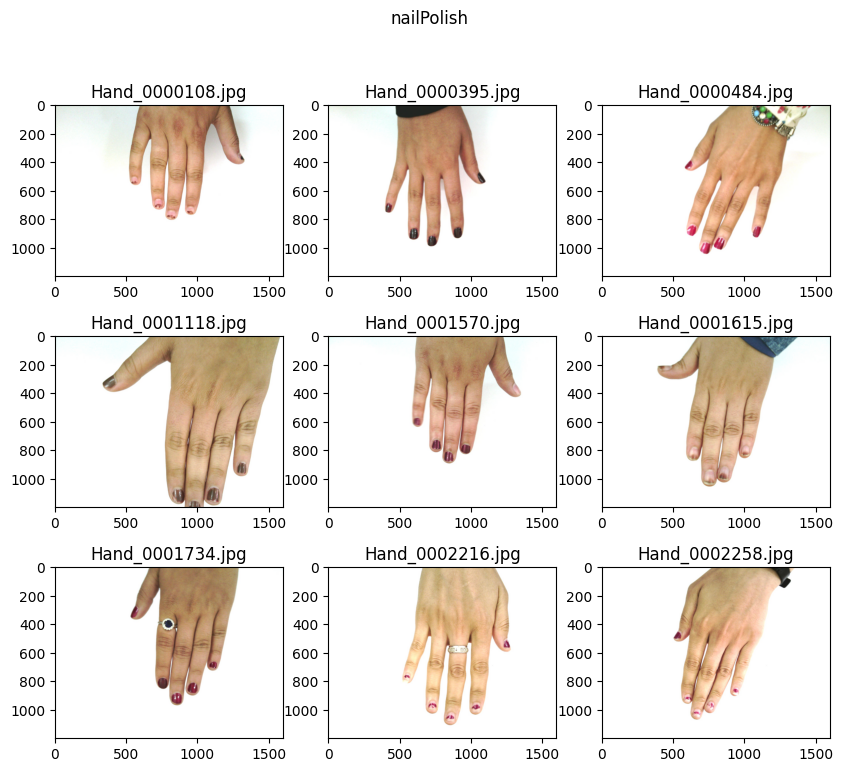

In [30]:
# import matplotlib.pyplot as plt

'''
dataset_dir_path is path of folder with all hand images

'''

def display_sample_imgs_in_subplots(filenames_list,dataset_dir_path=dataset_dir_path,whole_fig_title=None):
    plt.figure(figsize=(10,8.5)).tight_layout(h_pad=20)
    # plt.figure(figsize=(10,8)).tight_layout(rect=[0, 0.03, 1, 0.7])

    
    if whole_fig_title != None:
        plt.suptitle(whole_fig_title) ## set main figure title
    last_i=0
    count=0
    for i,filename in enumerate(filenames_list):        
        if (i==0) or (i == last_i+18):
            count+=1
            last_i=i
            plt.subplot(3,3,count)
            plt.imshow(plt.imread(f'{dataset_dir_path}/{filename}'))
            plt.gca().set_title(filename) ## to set title for subplot
            plt.axis("off")

        if count >= 9:
            break
    plt.show()




def display_column_images(col_name_list,df=df,display_sample_imgs_in_subplots=display_sample_imgs_in_subplots):
    '''
    takes display_sample_imgs_in_subplots function as argument
    '''
    for col_name in col_name_list:
        print(f'\n{col_name}'.upper())
        irreg_imgs_names_list=df[df[col_name] != 0 ]['imageName'].to_list()
        print(df[col_name].value_counts())
        print(f'number of images with {col_name}',len(irreg_imgs_names_list))
        display_sample_imgs_in_subplots(irreg_imgs_names_list,whole_fig_title=col_name)




col_name_list=['irregularities','accessories','nailPolish']
# df=pd.read_csv('HandInfo.csv')
display_column_images(col_name_list,display_sample_imgs_in_subplots=display_sample_imgs_in_subplots) ###     takes display_sample_imgs_in_subplots function as argument



### END OF EDA

In [ ]:
### trying to create tensorflow image dataset the way i want; generators are too slow 
### check the training speed by using the following; after modifying it of course
'''
from glob2 import glob

x_files = glob('inputs/*.jpg')
y_files = glob('targets/*.jpg')

files_ds = tf.data.Dataset.from_tensor_slices((x_files, y_files))

def process_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=(28, 28))
    return img

files_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(1)

original, target = next(iter(files_ds))
'''

"\nfrom glob2 import glob\n\nx_files = glob('inputs/*.jpg')\ny_files = glob('targets/*.jpg')\n\nfiles_ds = tf.data.Dataset.from_tensor_slices((x_files, y_files))\n\ndef process_img(file_path):\n    img = tf.io.read_file(file_path)\n    img = tf.image.decode_jpeg(img, channels=3)\n    img = tf.image.convert_image_dtype(img, tf.float32)\n    img = tf.image.resize(img, size=(28, 28))\n    return img\n\nfiles_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(1)\n\noriginal, target = next(iter(files_ds))\n"

In [ ]:
img_resize_shape=(120,160)
test_fraction=0.2
seed=1
train_img_set_tfds, test_img_set_tfds=image_dataset_from_directory(
    dataset_dir_path,
    labels=y_gen_enc_np.flatten().tolist(),
    # labels=None,

    validation_split=test_fraction,
    subset='both',
    seed=seed,
    image_size=img_resize_shape,
    batch_size=32
    )

Found 11076 files belonging to 2 classes.
Using 8861 files for training.
Using 2215 files for validation.


In [ ]:
# ## checking if the contents of the tensorflow dataset obj are images as intended
# count=0
# for i,j in test_img_set_tfds:
#     count+=1
#     if count==1:
#         print(i.numpy().shape)
#         print(j.numpy())

#     else:
#         break
# # print(count)
        
        


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, Dense, concatenate, Conv2D, MaxPooling2D, Dropout, Rescaling, RandomFlip, RandomRotation

In [ ]:
# import matplotlib.pyplot as plt
# len(train_img_set_tfds.take(1))
# # plt.figure(figsize=(10, 10))
# for image,label in train_img_set_tfds.take(1):
#     plt.imshow(image.numpy().astype('uint8'))
#     plt.title(int(label))
#     plt.axis('off')

In [ ]:
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

print(img_size_tuple )

(120, 160, 3)


(1200, 1600, 3)

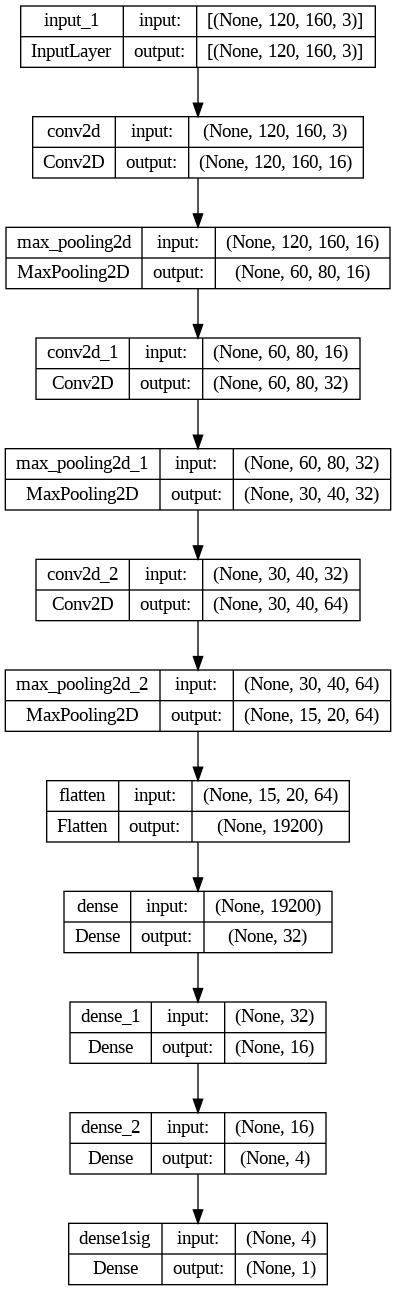

In [ ]:
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)


def build_img_net(img_size_tuple):
    input_layer=Input(shape=img_size_tuple )

    ## to convert images to grayscale
    # import keras_cv
    # keras_cv.layers.Grayscale(output_channels=1) ## see https://keras.io/api/keras_cv/layers/preprocessing/grayscale/


    data_augmentation = Sequential(
        [
            RandomFlip("horizontal"),
            RandomRotation(0.1),
        ]
    ) ## see https://keras.io/examples/vision/image_classification_from_scratch/
    x=data_augmentation(input_layer)
    x = Rescaling(1./255)(x)



    conv_nodes=(16,32,64)
    ##see  https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
    for f in conv_nodes:
        x= Conv2D(f, (3, 3), padding="same",activation='relu')(x)
        # x = Activation("relu")(x)
        # x = BatchNormalization(axis=chanDim)(x)
        x= MaxPooling2D(pool_size=(2, 2))(x)
        # x= Dropout(0.2)(x)
    x= Flatten()(x)
    x = Dense(32,activation='relu')(x)

    x= Dense(16,activation='relu')(x)

    x =Dense(4,activation='relu')(x)
    img_net=Model(inputs=[input_layer],outputs=x)
    return img_net 

img_net=build_img_net(img_size_tuple)
input_nets=[img_net]
# input_layers=[img_net_input_layer]
def make_final_keras_model(inputs_nets:list):
    ## this function is intended to combine one net that takes image
    ## as input and another that takes the metadata from the csv as input, together to form one single 
    ## neural net

    ## but for now let's just try with the image net only
    x=Dense(1,activation='sigmoid',name='dense1sig')(input_nets[0].output) ## output layer to predict gender 
    final_model=Model(inputs=input_nets[0].input,outputs=x)
    return final_model

final_model=make_final_keras_model(input_nets)

from tensorflow.keras.utils import plot_model
plot_model(final_model, show_shapes=True)

In [ ]:
### training
from keras.optimizers import SGD
final_model.compile(
    optimizer=SGD(lr=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
final_model.fit(
    train_img_set_tfds,
    # y=y_gen_enc,
    epochs=3,
    # callbacks=callbacks,
    validation_data=test_img_set_tfds,
    # batch_size=32
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


277/277 [==============================] - 63s 188ms/step - loss: 71006056.0000 - accuracy: 0.6418 - val_loss: 0.6673 - val_accuracy: 0.6257
Epoch 2/3
277/277 [==============================] - 55s 195ms/step - loss: 0.6565 - accuracy: 0.6459 - val_loss: 0.6619 - val_accuracy: 0.6257
Epoch 3/3
277/277 [==============================] - 53s 186ms/step - loss: 0.6518 - accuracy: 0.6459 - val_loss: 0.6612 - val_accuracy: 0.6257


In [ ]:
from datetime import datetime
today_date_str=datetime.now().strftime('%Y-%m-%d-%H-%M')
final_model.save(f'{drive_project_folder_path}/models/{today_date_str}_arjun_trained_model_3_epoch_SGD')

In [ ]:
# col_val_list_in_order_file_names_dict['id']

In [ ]:
# input_layer=Input(shape=)